In [15]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv(r'C:\Users\Rahul Mathew\Desktop\Python\ML pipeline\test_gplay_reviews.csv')

In [17]:
analyzer = SentimentIntensityAnalyzer()

In [18]:
# When loading a csv file, if some row has a value of 'None'(str) it will default to nan when loading via pandas
# To mitigate them replace nan with 'None' 
df = df.fillna('None')

In [19]:
scores = [analyzer.polarity_scores(r)['compound'] for r in df['Review']]

In [20]:
# Convert the scores to sentiments according to VADER documentation

def score_to_sentiment(score):
    if score >= 0.05:
        return 1
    elif score > -0.05 and score < 0.05:
        return 0
    else:
        return -1 

In [21]:
# Predicted sentiment values    
sentiments_pred = [score_to_sentiment(score) for score in scores]

In [22]:
# True Sentiment values
sentiments_true = df['Rating'].tolist()

In [23]:
# Classification report containing accuracy, precision, recall, f1-score
report = classification_report(sentiments_true, sentiments_pred)
print(report)

              precision    recall  f1-score   support

          -1       0.93      0.53      0.68      3340
           0       0.04      0.20      0.06       336
           1       0.89      0.87      0.88      7633

    accuracy                           0.75     11309
   macro avg       0.62      0.53      0.54     11309
weighted avg       0.88      0.75      0.79     11309



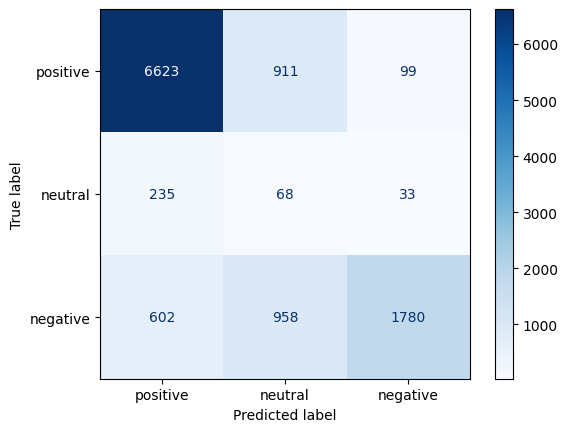

In [24]:
# Confusion matrix
cm = confusion_matrix(sentiments_true, sentiments_pred, labels=[1, 0, -1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["positive", "neutral", "negative"])
disp.plot(cmap='Blues')
plt.show()

# Error Analysis

In [86]:
sentiments_true = np.array(sentiments_true)
sentiments_pred = np.array(sentiments_pred)

In [87]:
# Get an array with True wherever its wrongly classified 
errors = ~(sentiments_true == sentiments_pred)

In [88]:
# Get the indices where its wrongly classified
wrongly_classified = df['Review'][errors]
len(wrongly_classified)

2838

In [89]:
# Rondomly sample 10% of the wrongly classified samples
for item in df['Review'][~errors].sample(n=len(wrongly_classified)//10, random_state=4):
    print(item)

very bad
not free app pay and use
Ato pay my money
Very good
amazing
fraud
aapke app uninstall karne ke baad bhi paise Kat leta hai auto pay sy Bina permission ke paise Kat lete Hain ye froad hai
not good app
Super Excellent Very Useful
Very good app and wonderful stories
fake app
please don t download this app this is fraud isa downlod karna sa apka account sa apna aap paisa cut ho jata hai
good
Good
Good
Nice stories
too waste app oka pani cheyandi kama sutra gurinchi cheppi mere Book cheyandi number ichi
kuku FM vare nice
Very good stories and ui
good
Good
very nice good
worst app ever
Happy hi you
nice app Interesting stories
Lovely app
good
very bad no money refund
Very useful in updating ourself
Good experience
very good
Super
No reason but loved it and relatable
Best app
kuku FM stole money....not pay refund my amount
good
now a days this is very useful when time is less.
Good
Nice app
just coin increased
good
very boring
It's nice story app for hearing I am so love it
very wors

#### Among the True Positives the wrongly classified ones are mostly Predicted as Neutral. 

So find out all the reviews which are actually Positive (True Positives) but predicted as Neutral (False Neutral)

In [93]:
ind_tp = np.where(sentiments_true == 1)[0]
ind_pred_n = np.where(sentiments_pred == 0)[0]

common = np.intersect1d(ind_tp, ind_pred_n)

for i in np.random.choice(common, size=len(common)//10, replace=False):
    print(df['Review'][i])

Awasome app
tq kuku fm for evar
Vera level....
I am going to listen
Nes
nine
Knowing what I don't know
Exllent app. All story are motivational.
informative app
Supper game
khub valo
bast app
Mat
Bear hai
Gyan prapti hot hai sunkar
Ecclent
Mice
ruhi saini
amezing
accha hai
Ggge
hihahsha
Beutiful
mehga hai
my favourite ku ku fm
App
verygood
Osum
Dil toch kar liya
Bahut achi story rehti h
if your hobby is listening then subscribe....
Osm
Lobed it!
Is aap me khani itni acchi hai aap sab log suno and download karo
v GD app.
supar
Intresting app
Aapki service theek hai lekin auto per Jarur Dhyan den
badhiya application
supar
nic
mnkesh
Khub valo acha kuku
Ajahar
I updated the app yesterday on 05 oct 2024...this version is very slow actually, i am unable to access the store to check my balance and buy new coins.
story not working properly today not going next clip
Acha hai
bast
Lobe it!
story ke aage ke episode to show Karo
osam
Refund money
vinod Kumar
Mst..
Benki
Exlent
Time pass
sahdeepkol

From the examples it can be noticed that even though the reviews themselves might be positive but they arent worded properly. Some have spelling mistakes, some are in hindi etc.

### Among the True Neutrals the wrongly classified ones are mostly Predicted as Positives

So find out all the reviews which are actually Neutral (True Neutral) but predicted as Positives (False Positive)

In [91]:
ind_tn = np.where(sentiments_true == 0)[0]
ind_pred_p = np.where(sentiments_pred == 1)[0]

common = np.intersect1d(ind_tn, ind_pred_p)

for i in np.random.choice(common, size=len(common)//10, replace=False):
    print(df['Review'][i])

Nice
Good app
good
Good
good
good
Not bad using same voice for all is not good
very good
Love
some books are not available, but it's great platform for us.
Nice
good
good
nice
super
nice
nice
Please re add 3x playback speed instead 2.5x speed
Good
good
Please my Paisa recover Please
It us good
Good


From the above examples its pretty clear that these are mostly single words like 'Nice', 'Good' which can be considered as Neutral or Positive

### Among the True Negatives the wrongly classified ones are mostly Predicted as Neutral

So find out all the reviews which are actually Negative (True Negative) but predicted as Neutral (False Neutral)

In [92]:
ind_tneg = np.where(sentiments_true == -1)[0]
ind_pred_n = np.where(sentiments_pred == 0)[0]

common = np.intersect1d(ind_tneg, ind_pred_n)

for i in np.random.choice(common, size=len(common)//10, replace=False):
    print(df['Review'][i])

Bed platform
sabse ghatiya app,, paisa nehi he is liye logoke account se paisa kate ja raha he,,, agar 1 star se vi kam ka option hota to iss app ko wohi deta,
worest app
Doesn't have stories in english
Baler app bara
bakwas
bahut hi ghatiya sasta dikha kar maja maar leta hai
chiter app
this aap is mostly looting money from people through auto debit without confirmation
399 h 28/02/2025 399
wahiyaat app
mera paisa meri Marji k khilaf kat liya gya bhut ghatiya aap h chi chi mt install karna
rhis app is frud I report this app
Money matter's...
bedly
Sunil Kumar
farji app hai mere account se paise gye
Very very frud app
Very cheap app mere account se 1000 rupee Nikal liye everyone don't use this app
Full of bug can't even open app
Wrost experience
kuku FM ne 560 ka froad Kiya Hai mere mere account se 560 Kat liye hain Se Koi download na Karen Varna aapka account saaf ho sakta hai
unsubscribe kerne ke baad bhi paisa kata gya bhot galat hai
bakwas hai
Ine logon Ne Mera account se600 rupaye 

From the above examples it is clear that these are written in English but the meaning is in Hindi, Telugu, Tamil, etc